# Walmart Recruiting - Store Sales Forecasting

There are 45 Walmart stores located in different regions and their histocial sales data are provided.

Each store contains many different departments.

1. stores.csv contains informaiton about these 45 stores which includes the type and size of the store.
2. train.csv is historical training data, which covers from 2010/02/05 to 2012/11/01, information provided include:
store number, department number, date, weekly sales, isholidy.
3. test.csv is identical to train.csv, predict the sales of store, dpt and data for this file.
4. features.csv description: store, date, temperature, fuel price, markdown1-5: promotion markdowns from Walmart, cpi:customer price index, unempolyment rate, isholiday.
5. Holidays within the following weeks in the data are provided:
Super Bowl : 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labor Day : 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving : 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas : 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Walmart post this data set on Kaggle in order to seek appropriated candidates fill in their data scientist postions, its goal is to find out the best submission that can provide the best forecast of Walmart sales based on 45 Walmart stores' data.

# 1. Data Wrangling

This step focuses on collecting data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

# 1.1 Imports
Placing your imports all together at the start of your notebook means you only need to consult one place to check your notebook's dependencies. 

In [2]:
# Import pandas, numpy, matplolib.pyplot, and seabron lib with preprocessing.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1.2 Load The Walmart Store Data

In [42]:
# Import data from local files, the data source is kaggle.com
Df_Features = pd.read_csv('features.csv/features.csv')
Df_Store = pd.read_csv('stores.csv')
Df_Train = pd.read_csv('train.csv/train.csv')
Df_Test = pd.read_csv('test.csv/test.csv')

Good first steps in auditing the data are the info method and displaying the first few records with head.

# 1.3 Explore The Data

In [43]:
# Check the data quanlity with df.head() function.
Df_Features.head() # We'll need store,date,isholiday from this data.

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


From Df_Features.head() we can see there are 12 columsn and alot of NaN exist with all markdown columns.

In [44]:
# Check how many rows and columns are there in the dataframe.
Df_Features.shape

(8190, 12)

Now we check the data type for each columns and we can see most of them are float, theres one int64,one object, one bool.

In [7]:
Df_Features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

# 1.4 Number of Missing Values By Column
Count the number of missing values in each column and sort them.

In [47]:
# Check how many nan values are there for each column.
Df_Features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [64]:
Df_Store.head()
# Check store information,there are two types of store and 45 stores in total, their sizes are different.

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [65]:
Df_Store.shape

(45, 3)

In [66]:
Df_Store.isnull().sum()
# There is no NaN in store data frame.

Store    0
Type     0
Size     0
dtype: int64

In [67]:
Df_Train.head()
# Check the first 5 rows in Df_Train data which we will use later.

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [68]:
Df_Train.shape

(421570, 5)

In [69]:
Df_Train.isnull().sum()
# There is no NaN in our train data.

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [70]:
Df_Test.head()
# Check test data for its first 5 rows.

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [71]:
Df_Test.shape

(115064, 4)

In [72]:
Df_Test.isnull().sum()
# There is no NaN value in test data frame as well.

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [73]:
Df_Train.info()
# Getting data types, value count etc for train data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [74]:
Df_Train.describe()
# From this table we have a sense of weekly sales, which we will need to predict it later with train data.

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


The average weekly_sales is 15981, its standard deviation is 22711 with a negative min and 693099 max sales.

In [8]:
Df_Features.info()
# We can get an over view of features dataset by its info() function.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [10]:
Df_Features['IsHoliday'].value_counts(dropna=True)
#Count for holiday numbers for later use, we dropped rows without this data.

False    7605
True      585
Name: IsHoliday, dtype: int64

# 1.5 Prepare the data for EDA

In [48]:
# Isholiday: convert Isholiday, false to 0, true to 1.
Df_Features['IsHoliday'] = LabelEncoder().fit_transform(Df_Features['IsHoliday'])
Df_Store['Size'] = LabelEncoder().fit_transform(Df_Store['Size'])
Df_Store['Type'] = LabelEncoder().fit_transform(Df_Store['Type'])
Df_Train['IsHoliday'] = LabelEncoder().fit_transform(Df_Train['IsHoliday'])
Df_Test['IsHoliday'] = LabelEncoder().fit_transform(Df_Test['IsHoliday'])

In [49]:
Df_Train_Features = pd.merge(Df_Train,Df_Features,on=['Store','Date','IsHoliday'],how='inner')
Df_Test_Features = pd.merge(Df_Test,Df_Features,on=['Store','Date','IsHoliday'],how='inner')
# Merge tables with pd.merge function for later modeling use.

In [50]:
Df_Train_Features

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [51]:
Df_Test_Features

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,2,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
2,1,3,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
3,1,4,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
4,1,5,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115060,45,94,2013-07-26,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115061,45,95,2013-07-26,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115062,45,97,2013-07-26,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


Merge train test data with their matched features.

In [52]:
Df_train = pd.merge(Df_Train_Features,Df_Train,how='inner')
Df_test = pd.merge(Df_Test_Features,Df_Test,how='inner')

In [53]:
Df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [54]:
Df_train.shape
# Check data shape.

(421570, 14)

In [55]:
Df_train.isnull().sum()
# Check and count for null values.

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [56]:
Df_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,2,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
2,1,3,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
3,1,4,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
4,1,5,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115060,45,94,2013-07-26,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115061,45,95,2013-07-26,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115062,45,97,2013-07-26,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [57]:
Df_test.shape
# Check data shape for test.

(115064, 13)

# 1.6 Missing Values for Train/Test data
Fill missing value with appropriated methods.

In [59]:
Df_test.isnull().sum()
# Check and count NaN value for null value in test data.

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

In [60]:
Df_train.fillna(0.0,inplace=True)
Df_test.fillna(0.0,inplace=True)
# Fill NaN value with 0 since we need to modeling them.

In [61]:
Df_train.isnull().sum()
# Check data again to see there's no NaN.

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [62]:
Df_test['CPI'].fillna(Df_test['CPI'].mean(),inplace=True)
Df_test['Unemployment'].fillna(Df_test['Unemployment'].mean(),inplace=True)
# Fill NaN with avaerage cip for test data.
# Fill NaN with average unemployment rate for test data.
# Check test data again for null.

In [63]:
Df_test.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [64]:
Df_train.head()
#Take a look at the train data overview and know there's no null included.

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106


In [65]:
Df_test.head()
#Take a look at the test data overview and know there's no null included.

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


# 2. Exploratory Data Analysis
Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task

In [66]:
Df_train['Date'] = pd.to_datetime(Df_train['Date'])
Df_test['Date'] = pd.to_datetime(Df_test['Date'])
# Change the date data so we can pull out year month day data from the data set.

In [67]:
Df_train['Year'] = pd.DatetimeIndex(Df_train['Date']).year
Df_Weekly_Sale_yearly = Df_train[['Year','Dept','Weekly_Sales']].groupby(['Year','Dept']).mean().reset_index()
Df_Weekly_Sale_yearly.head()
# Group weekly sale by year and prepare it for later visualization. 

,Year,Dept,Weekly_Sales
0,2010,1,19834.969620
1,2010,2,43543.024713
2,2010,3,11616.267167
3,2010,4,25730.225718
4,2010,5,24711.963623


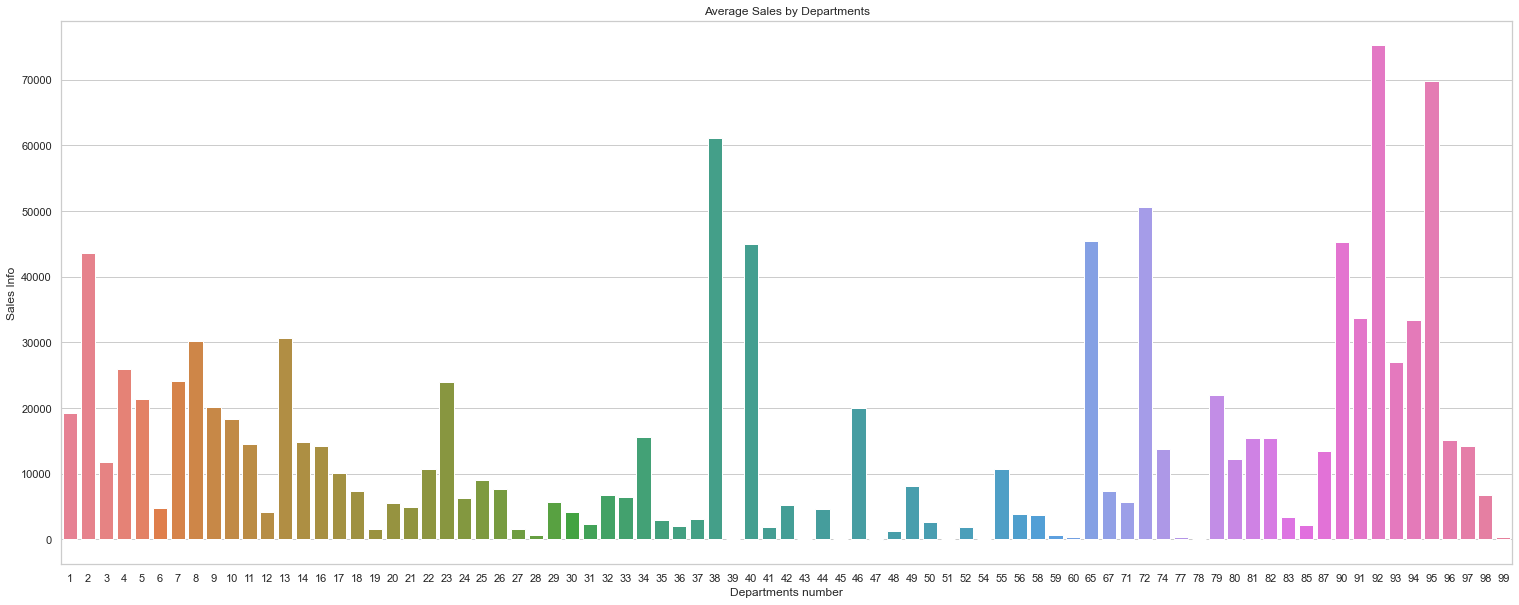

In [68]:
import warnings
warnings.filterwarnings("ignore")
Sales_Weekly = Df_train['Weekly_Sales'].groupby(Df_train['Dept']).mean()
# Group by departments, return mean of weekly sales in departments.
plt.figure(figsize=(26,10))
sns.barplot(Sales_Weekly.index,Sales_Weekly.values,palette='husl')
plt.title('Average Sales by Departments')
plt.xlabel('Departments number')
plt.ylabel('Sales Info')
plt.show()

From this barplot we can see departments 2, 38, 39, 65, 72, 90, 92, 95 are doing better and have more than $30000 sales while some departments did not good.

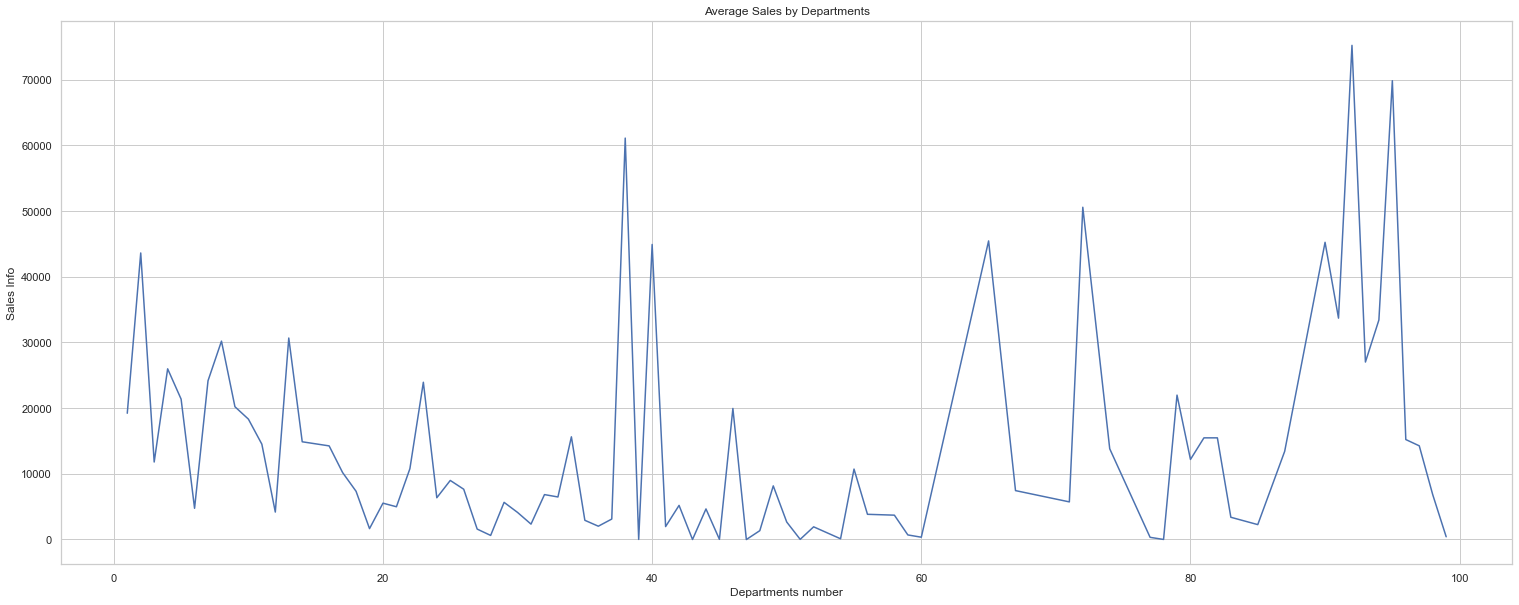

In [69]:
plt.figure(figsize=(26,10))
sns.lineplot(Sales_Weekly.index,Sales_Weekly.values,palette='husl')
plt.title('Average Sales by Departments')
plt.xlabel('Departments number')
plt.ylabel('Sales Info')
plt.show()

This lineplot graph provides better view for range of departments perfromace, we can see around 40, 65, 75, 90-100 department numbers, these departments perform better in weekly sales than other departments.

<AxesSubplot:xlabel='Type', ylabel='Size'>

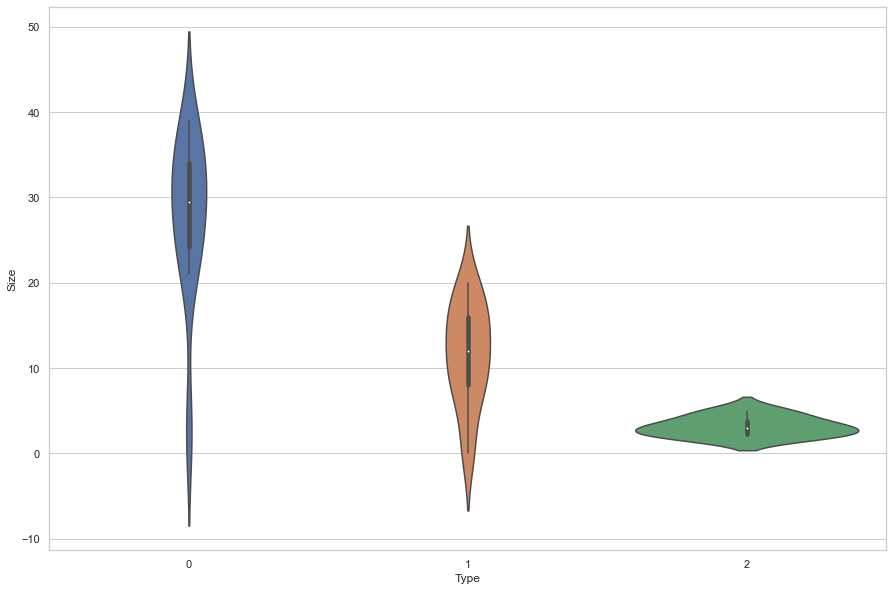

In [70]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Type',y='Size',data = Df_Store)

So from this violinplot we can see type 0 has biggest size, type 1 is in middle and type 2 of stores has smaller size.

# 2.1 Relationship between features

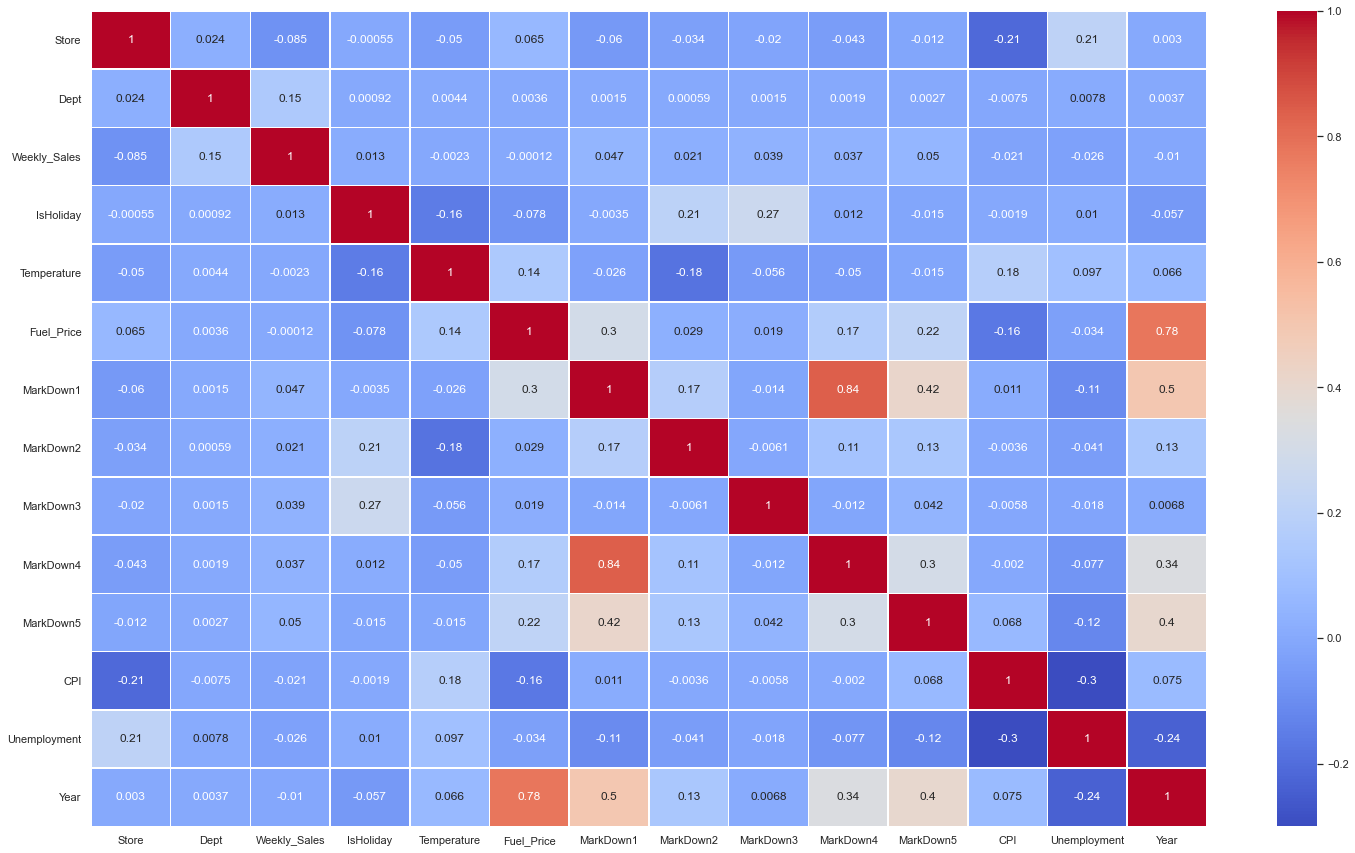

In [71]:
plt.figure(figsize=(25,15))
sns.heatmap(Df_train.corr(),annot=True,linewidths=.5,cmap="coolwarm")
plt.show()

We then look at the heatmap and it provides us with a great view of correlations between variables and gives a sense of how they are corrlated.

# 2.2 Yearly Sale Overview

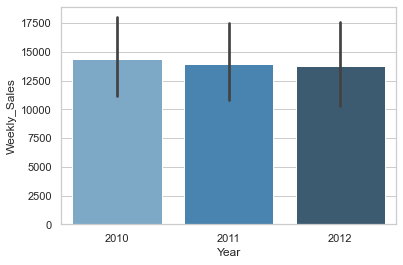

In [72]:
sns.set_theme(style="whitegrid")
_ = sns.barplot(data = Df_Weekly_Sale_yearly,x=Df_Weekly_Sale_yearly['Year'],y=Df_Weekly_Sale_yearly['Weekly_Sales'],palette="Blues_d")
plt.show()

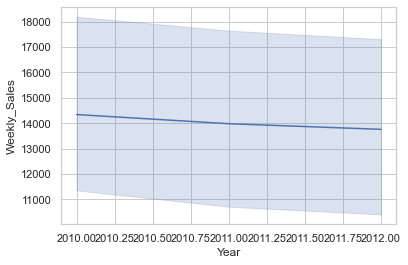

In [73]:
_ = sns.lineplot(data = Df_Weekly_Sale_yearly,x=Df_Weekly_Sale_yearly['Year'],y=Df_Weekly_Sale_yearly['Weekly_Sales'])
plt.show()

So according to the barplot and lineplot, the yearly average sales of Walmart is going down silghty, and it is more obvious by looking at the lineplot that there is a downtrend on the sales over time.

Pairplot is taking too long, so the scatter plots are provided manually here.

# 2.3 Relationship Between Weekly Sales and Features.

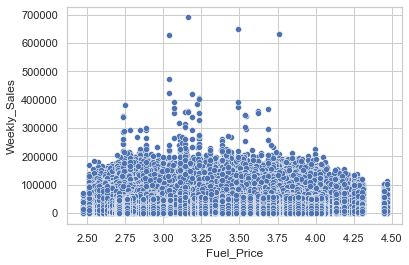

In [40]:
_ = sns.scatterplot(data=Df_train, x=Df_train['Fuel_Price'], y=Df_train['Weekly_Sales'])
# Get some scatterplots for columnscompare to weekly sales since pairplots takes too long to process.

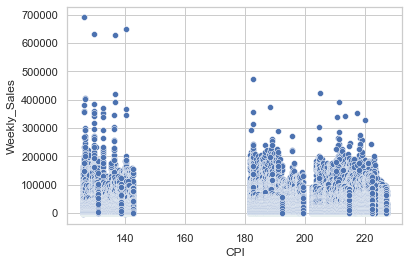

In [41]:
_ = sns.scatterplot(data=Df_train, x=Df_train['CPI'], y=Df_train['Weekly_Sales'])
# High CPI refers to lower weekly sales. 

Holidays tend to have more sales than weekdays. 

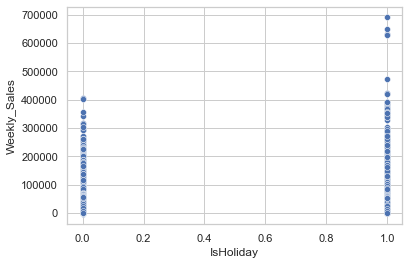

In [74]:
_ = sns.scatterplot(data=Df_train, x=Df_train['IsHoliday'], y=Df_train['Weekly_Sales'])

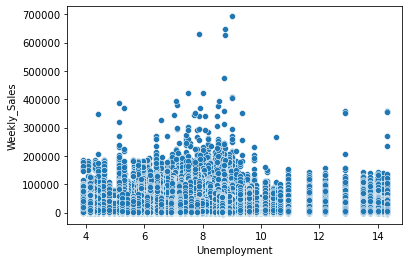

In [178]:
_ = sns.scatterplot(data=Df_train, x=Df_train['Unemployment'], y=Df_train['Weekly_Sales'])

7-8 unemployment rate has higher weekly sales.

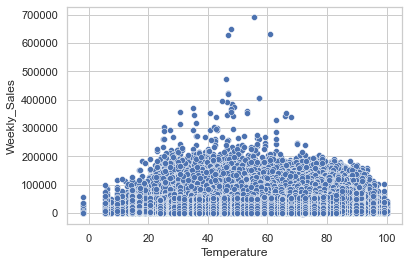

In [204]:
_ = sns.scatterplot(data=Df_train, x=Df_train['Temperature'], y=Df_train['Weekly_Sales'])

Temperatures between 23 to 60 has higher weekly sales than other temperatures.

# 3. Preprocess and Training Data
Data Preprocessing is that step in which the data gets transformed, or Encoded, to bring it to such a state that now the machine can easily parse it. In other words, the features of the data can now be easily interpreted by the algorithm.